In [7]:
#ANÁLISIS DE LOS DATOS

In [27]:
import pandas as pd


In [28]:
datos_upna = sacar_notas_upna(grados_edu)
datos_upv = sacar_notas_upv(grados_edu)
datos_upct = scrape_upct(grados_edu)
datos_ucm = sacar_notas_ucm(grados_edu)


In [29]:
# FILTRADO: eliminar grados repetidos
datos_upv_limpios = []
grados_vistos = set()

for d in datos_upv:
    if d["grado"] not in grados_vistos:
        grados_vistos.add(d["grado"])
        datos_upv_limpios.append(d)


In [30]:
# Unimos todos los conjuntos de datos en una sola lista
datos_totales = datos_upna + datos_upv_limpios + datos_upct + datos_ucm

# Creamos un DataFrame de pandas a partir de la lista total de datos
df = pd.DataFrame(datos_totales)


In [32]:
#Limpieza columna notas de corte para extraer valor numérico válido
df["nota_corte_num"] = (
    df["nota_corte"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.extract(r"(\d+(?:\.\d+)?)", expand=False)
)

df["nota_corte_num"] = pd.to_numeric(
    df["nota_corte_num"],
    errors="coerce"
)



In [33]:
# Eliminamos las filas donde la nota de corte es NaN
df = df.dropna(subset=["nota_corte_num"])


In [34]:
# Agrupamos por universidad y contamos cuántas notas de corte hay en cada una
df.groupby("universidad")["nota_corte_num"].count()



universidad
UCM     74
UPCT    21
UPNA    28
UPV     64
Name: nota_corte_num, dtype: int64

In [35]:
#Nota media por universidad
media_por_uni = df.groupby("universidad")["nota_corte_num"].mean().round(2)
print(media_por_uni)


universidad
UCM      8.43
UPCT     9.46
UPNA     8.90
UPV     10.10
Name: nota_corte_num, dtype: float64


In [36]:
#Grado que tiene una mayor nota de corte en cada universidad
idx = df.groupby("universidad")["nota_corte_num"].idxmax()

grado_mas_exigente = df.loc[idx, [  "universidad", "grado", "nota_corte_num"]]

print(grado_mas_exigente)


    universidad                                              grado  \
177         UCM                               Matemáticas - Física   
104        UPCT  Doble Título Específico: Ingeniería Biomédica ...   
25         UPNA  D.G. Ing. Biomédica + Tecnologías de Telecomun...   
75          UPV                     PARS en Ingeniería Aeronáutica   

     nota_corte_num  
177          13.698  
104          12.732  
25           12.091  
75           13.371  


In [37]:
#Top 10 grados con mayor nota de corte
top10 = df.sort_values("nota_corte_num", ascending=False).head(10)
print(top10[["universidad", "grado", "nota_corte"]])


    universidad                                              grado nota_corte
177         UCM                               Matemáticas - Física     13,698
173         UCM               Ingeniería Informática - Matemáticas     13,465
75          UPV                     PARS en Ingeniería Aeronáutica     13,371
41          UPV  Doble grado en Matemáticas + Ingeniería Inform...     13,333
65          UPV                            Ingeniería Aeroespacial     13,176
88          UPV  Doble grado en Ciencia de Datos + Ingeniería d...     12,819
64          UPV                               Ingeniería Biomédica     12,807
135         UCM      Ingeniería de Datos e Inteligencia Artificial     12,775
104        UPCT  Doble Título Específico: Ingeniería Biomédica ...     12,732
168         UCM          Economía - Matemáticas y Ciencia de Datos     12,716


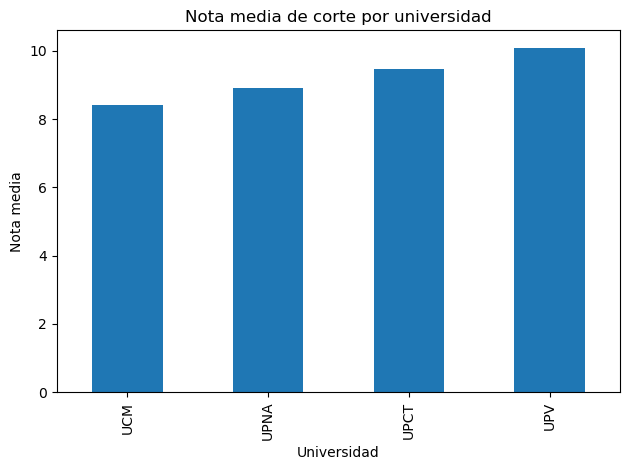

In [42]:
#Gráfico notas media de corte por universidad
import matplotlib.pyplot as plt
plt.figure()
media_por_uni.sort_values().plot(kind="bar")
plt.title("Nota media de corte por universidad")
plt.xlabel("Universidad")
plt.ylabel("Nota media")
plt.tight_layout()
plt.show()


In [39]:
#Filtra el DataFrame para quedarse solo con las carreras que contienen la palabra ciencia de datos en su nombre.
carrera = "Ciencia de Datos"
df_carrera = df[df["grado"].str.contains(carrera, case=False, na=False)]
print(df_carrera[["universidad", "grado", "nota_corte_num"]])


    universidad                                              grado  \
4          UPNA                        D.G. Ciencia de Datos + ADE   
15         UPNA                                   Ciencia de Datos   
19         UPNA              D.GL Ciencia de Datos + Biotecnología   
78          UPV                                   Ciencia de Datos   
88          UPV  Doble grado en Ciencia de Datos + Ingeniería d...   
129         UCM                     Matemáticas y Ciencia de Datos   
145         UCM                          Ciencia de Datos Aplicada   
168         UCM          Economía - Matemáticas y Ciencia de Datos   

     nota_corte_num  
4            12.000  
15           10.060  
19           11.790  
78           10.908  
88           12.819  
129          11.964  
145          10.937  
168          12.716  


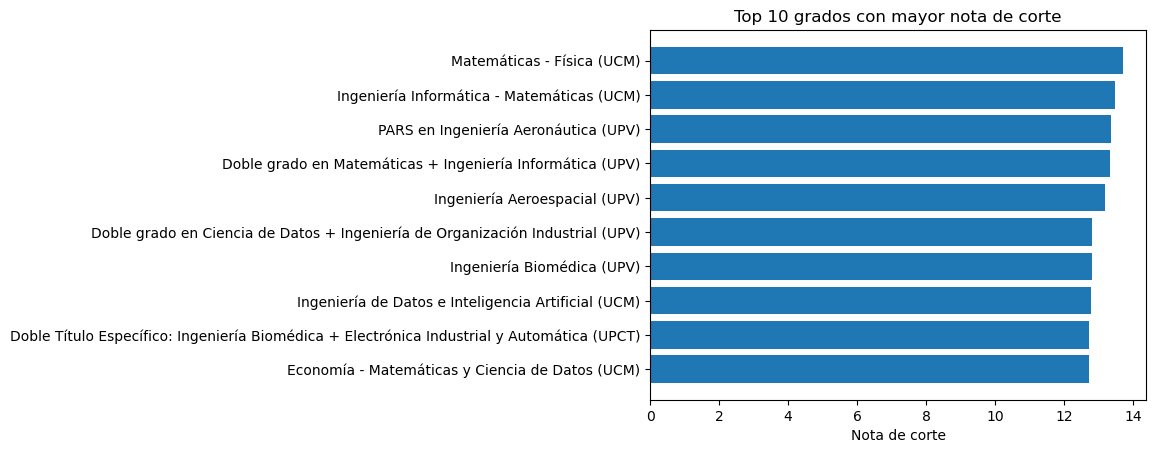

In [41]:
#Gráfico de los 10 grados más exigentes (mayor nota de corte), indicando universidad.

plt.figure()
bars = plt.barh(
    top10["grado"] + " (" + top10["universidad"] + ")",
    top10["nota_corte_num"]
)

plt.gca().invert_yaxis()
plt.title("Top 10 grados con mayor nota de corte")
plt.xlabel("Nota de corte")
plt.show()


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
driver = webdriver.Chrome()
driver.get("https://www.educaweb.com/contenidos/educativos/estudios-universitarios/oferta-titulaciones-grado-rama-conocimiento/listado-grados-universitarios/")

wait = WebDriverWait(driver, 15)

# Esperamos a que aparezcan los enlaces de los grados

time.sleep(5)

grados_edu = []

links = driver.find_elements(By.TAG_NAME, "a")
for link in links:
    texto = link.text.strip()
    if texto and texto[0].isupper() and "Grado" not in texto.lower():
        grados_edu.append(texto)

driver.quit()

grados_edu = list(set(grados_edu))
print(f"Grados encontrados: {len(grados_edu)}")
print(grados_edu[:20])


Grados encontrados: 753
['Grado en Ingeniería Matemática en Ciencia de Datos', 'Grado en Técnicas de Interacción Digital y Multimedia', 'Grado en Comunicación de las Organizaciones', 'Grado en Diseño y Gestión de Procesos Transmedia', 'Grado en Ingeniería en Diseño Industrial', 'Carreras Universitarias', 'Oposiciones', 'Grado en Historia y Ciencias de la Música y Tecnología Musical', 'Grado en Diseño Gráfico y Tecnologías Creativas', 'Grado en Gestión Logística y Transporte', 'Grado en Ingeniería de Sonido e Imagen en Telecomunicación', 'Grado en Ingeniería de Energías Renovables', 'Grado en Publicidad y Marketing Digital', 'Grado en Estudios de Inglés y Español', 'Grado en Estudios de Asia y África: Chino', 'Grado en Biomedicina', 'Grado en Física', 'Grado en Lingüística y Lenguas Aplicadas', 'Grado en Comunicación Audiovisual y Nuevos Medios', 'Grado en Negocios Internacionales / International Business']


In [2]:
import requests
from bs4 import BeautifulSoup

def sacar_dobles_grados_edu():
    url = "https://www.educaweb.com/contenidos/educativos/estudios-universitarios/oferta-titulaciones-grado-rama-conocimiento/dobles-titulaciones-grado/"
    pagina = requests.get(url)
    sopa = BeautifulSoup(pagina.text, "html.parser")

    dobles = []

    # Buscamos listas de textos que parezcan títulos de dobles grados
    for li in sopa.find_all("li"):
        texto = li.get_text(strip=True)
        if "Doble Grado" in texto:
            # limpiar posibles duplicados o enlaces vacíos
            if texto not in dobles:
                dobles.append(texto)

    return dobles


In [3]:
dobles_grados_edu = sacar_dobles_grados_edu()


In [4]:
grados_edu = grados_edu + dobles_grados_edu


In [5]:
import unicodedata
def normalizar(texto):
    """
    Se usa para evitar problemas por mayúsculas, minúsculas o acentos.
    """

    # Pasamos todo el texto a minúsculas
    texto = texto.lower()

    # Normalizamos el texto para separar letras y acentos
    texto = unicodedata.normalize("NFD", texto)

    # Eliminamos los acentos (categoría 'Mn')
    texto = "".join(
        c for c in texto
        if unicodedata.category(c) != "Mn"
    )

    # Devolvemos el texto limpio
    return texto

def coincide(grado_edu, grado_uni):
    # Normalizamos el nombre del grado de educación y lo separamos en palabras
    palabras_edu = set(normalizar(grado_edu).split())

    # Normalizamos el nombre del grado de la universidad y lo separamos en palabras
    palabras_uni = set(normalizar(grado_uni).split())

    # Calculamos las palabras que tienen en común ambos conjuntos
    palabras_comunes = palabras_edu & palabras_uni

    # Devolvemos True si hay al menos 2 palabras en común
    return len(palabras_comunes) >= 2




In [6]:
import requests
from bs4 import BeautifulSoup

def sacar_notas_upna(grados_edu):
    url = "https://www.unavarra.es/sites/estudios/acceso-y-admision/admision-en-estudios-de-grado/notas-de-corte-y-simulador.html"
    web = BeautifulSoup(requests.get(url).text, "html.parser")

    datos_upna = []
    grados_vistos = set()

    tabla = web.find("table")
    filas = tabla.find_all("tr")

    for fila in filas:
        columnas = fila.find_all("td")
        if len(columnas) < 2:
            continue

         # Extraemos el nombre del grado  
        grado_web = columnas[0].text
        
        # Limpiamos el nombre del grado
        grado_web_limpio = grado_web.replace("Grado en", "").split("(")[0].strip()
        nota = columnas[1].get_text(strip=True)

         # Comparamos el grado con los de Educaweb
        for grado in grados_edu:
            if coincide(grado, grado_web_limpio):
                if grado_web_limpio not in grados_vistos:
                    # Si coincide y no se ha guardado antes, lo añadimos
                    datos_upna.append({
                        "universidad": "UPNA",
                        "grado": grado_web_limpio,
                        "nota_corte": nota
                    })
                    # Marcamos el grado como ya guardado
                    grados_vistos.add(grado_web_limpio)
                break

    return datos_upna
print(sacar_notas_upna(grados_edu))

[{'universidad': 'UPNA', 'grado': 'Administración y Dirección de Empresas', 'nota_corte': '8,700'}, {'universidad': 'UPNA', 'grado': 'D.G. Internacional ADE + Economía', 'nota_corte': '10,547'}, {'universidad': 'UPNA', 'grado': 'D.G. ADE + Derecho', 'nota_corte': '10,940'}, {'universidad': 'UPNA', 'grado': 'D.G. Internacional ADE + Derecho', 'nota_corte': '10,972'}, {'universidad': 'UPNA', 'grado': 'D.G. Ciencia de Datos + ADE', 'nota_corte': '12,000'}, {'universidad': 'UPNA', 'grado': 'Relaciones Laborales y Recursos Humanos', 'nota_corte': '7,640'}, {'universidad': 'UPNA', 'grado': 'Maestro Ed. Infantil', 'nota_corte': '8,590'}, {'universidad': 'UPNA', 'grado': 'Maestro Ed. Infantil Internacional', 'nota_corte': '9,223'}, {'universidad': 'UPNA', 'grado': 'Maestro Ed. Primaria', 'nota_corte': '8,859'}, {'universidad': 'UPNA', 'grado': 'Maestro Ed. Primaria Internacional', 'nota_corte': '8,944'}, {'universidad': 'UPNA', 'grado': 'D.G. Ed. Infantil + Ed. Primaria', 'nota_corte': '9,832'

In [7]:
def sacar_notas_upv(grados_edu):
    url = "https://www.upv.es/pls/oalu/sic_futuroalumno.notascorte?p_idioma=c"
    soup = BeautifulSoup(requests.get(url).content, "html.parser")

    # Lista donde guardaremos los resultados finales
    datos_upv = []

    # Conjunto para evitar guardar el mismo grado más de una vez
    grados_vistos = set()

    # La tabla correcta es la última de la página
    tabla = soup.find_all("table")[-1]
    filas = tabla.find_all("tr")

    # Localizamos dinámicamente la columna "General"
    cabecera = filas[0].find_all("th")
    indice_general = [c.get_text(strip=True) for c in cabecera].index("General")

    # Recorremos las filas de datos 
    for fila in filas[1:]:

        # Extraemos las celdas de la fila
        celdas = fila.find_all("td")

        # Si la fila no tiene suficientes columnas, la ignoramos
        if len(celdas) <= indice_general:
            continue

        # Extraemos y limpiamos el nombre del grado
        grado_web = celdas[0].text
        grado_web_limpio = grado_web.replace("Grado en", "").split("(")[0].strip()

        # Extraemos la nota de corte general
        nota = celdas[indice_general].get_text(strip=True)

        # Comparamos el grado con la lista base de Educaweb
        for grado in grados_edu:
            if coincide(grado, grado_web_limpio):

                # Evitamos duplicados
                if grado_web_limpio not in grados_vistos:
                    datos_upv.append({
                        "universidad": "UPV",
                        "grado": grado_web_limpio,
                        "nota_corte": nota
                    })
                    grados_vistos.add(grado_web_limpio)

                break
    return datos_upv
print(sacar_notas_upv(grados_edu))

[{'universidad': 'UPV', 'grado': 'Bellas Artes', 'nota_corte': '9,946'}, {'universidad': 'UPV', 'grado': 'Conservación y Restauración de Bienes Culturales', 'nota_corte': '6,512'}, {'universidad': 'UPV', 'grado': 'Diseño y Tecnologías Creativas', 'nota_corte': '11,568'}, {'universidad': 'UPV', 'grado': 'Ciencia y Tecnología de los Alimentos', 'nota_corte': '9,51'}, {'universidad': 'UPV', 'grado': 'Ciencias Ambientales', 'nota_corte': '7,08'}, {'universidad': 'UPV', 'grado': 'Doble grado en Administración y Dirección de Empresas + Ciencia y Tecnología de los Alimentos', 'nota_corte': '10,465'}, {'universidad': 'UPV', 'grado': 'Doble grado en Biotecnología + Ingeniería Agroalimentaria y del Medio Rural', 'nota_corte': '11,84'}, {'universidad': 'UPV', 'grado': 'Doble  Biotecnología + Química', 'nota_corte': '12,674'}, {'universidad': 'UPV', 'grado': 'Doble  Ciencias Ambientales + Ciencias y Tecnologías del Mar', 'nota_corte': '9,689'}, {'universidad': 'UPV', 'grado': 'Doble grado en Ingen

In [8]:
import requests
from bs4 import BeautifulSoup

def sacar_notas_ucm(grados_edu):
    url = "https://www.ucm.es/notas-de-corte"
    soup = BeautifulSoup(requests.get(url).text, "html.parser")

    # Lista donde guardaremos los resultados finales
    datos_ucm = []

    # Conjunto para evitar guardar grados duplicados
    grados_vistos = set()

    # Recorremos todas las filas de las tablas de la página
    for fila in soup.find_all("tr"):
        
        # Extraemos las celdas de cada fila
        celdas = fila.find_all("td")

        # Si la fila no tiene al menos 3 columnas, no contiene datos válidos
        if len(celdas) < 3:
            continue

        # Extraemos el nombre del grado (segunda columna)
        grado_web = celdas[1].text
        
        if grado_web.isdigit() and int(grado_web) >= 150:
            continue

        # Limpiamos el nombre del grado eliminando textos adicionales
        grado_web_limpio = grado_web.replace("Grado en", "").split("(")[0].strip()

        # Extraemos la nota de corte y eliminamos posibles asteriscos
        nota = celdas[2].get_text(strip=True).replace("*", "")

        # Comparamos el grado con la lista base obtenida de Educaweb
        for grado in grados_edu:
            if coincide(grado, grado_web_limpio):

                # Si el grado coincide y no se ha guardado antes, lo añadimos
                if grado_web_limpio not in grados_vistos:
                    datos_ucm.append({
                        "universidad": "UCM",
                        "grado": grado_web_limpio,
                        "nota_corte": nota
                    })
                    grados_vistos.add(grado_web_limpio)
                break

    return datos_ucm
print(sacar_notas_ucm(grados_edu))

[{'universidad': 'UCM', 'grado': 'TITULACIONES DE GRADO', 'nota_corte': 'GRUPO 1'}, {'universidad': 'UCM', 'grado': 'Bellas Artes', 'nota_corte': '9,936'}, {'universidad': 'UCM', 'grado': 'Ciencias de las Religiones', 'nota_corte': '5,000'}, {'universidad': 'UCM', 'grado': 'Conservación y Restauración del Patrimonio Cultural', 'nota_corte': '9,600'}, {'universidad': 'UCM', 'grado': 'Español: Lengua y Literatura', 'nota_corte': '5,000'}, {'universidad': 'UCM', 'grado': 'Estudios Ingleses', 'nota_corte': '5,000'}, {'universidad': 'UCM', 'grado': 'Estudios Semíticos e Islámicos', 'nota_corte': '5,000'}, {'universidad': 'UCM', 'grado': 'Estudios Teatrales', 'nota_corte': '5,378'}, {'universidad': 'UCM', 'grado': 'Filología Clásica', 'nota_corte': '5,000'}, {'universidad': 'UCM', 'grado': 'Filosofía, Política y Economía', 'nota_corte': '8,384'}, {'universidad': 'UCM', 'grado': 'Historia del Arte', 'nota_corte': '5,000'}, {'universidad': 'UCM', 'grado': 'Lenguas Modernas y sus Literaturas', 

In [9]:
def scrape_upct(grados_edu):
    driver = webdriver.Chrome()
    driver.get("https://admision.upct.es/pruebas-de-acceso/notas-de-corte")

    # Esperamos unos segundos para asegurarnos de que la tabla se ha cargado
    time.sleep(5)

    # Lista donde guardaremos los resultados finales
    datos_upct = []

    # Conjunto para evitar guardar grados duplicados
    grados_vistos = set()

    # Buscamos todas las filas de la tabla de notas de corte
    filas = driver.find_elements(By.CSS_SELECTOR, "table tr")

    # Recorremos cada fila de la tabla
    for fila in filas:

        # Extraemos las celdas de cada fila
        celdas = fila.find_elements(By.TAG_NAME, "td")

        # Si la fila no tiene al menos 3 columnas, no contiene datos válidos
        if len(celdas) < 3:
            continue

        # Extraemos el nombre del grado (segunda columna)
        grado_web = celdas[1].text.strip()

        # Limpiamos el nombre del grado eliminando textos adicionales
        grado_web_limpio = grado_web.replace("Grado en", "").split("(")[0].strip()

        # Extraemos la nota de corte
        nota = celdas[2].text.strip()

        # Comparamos el grado con la lista base obtenida de Educaweb
        for grado in grados_edu:
            if coincide(grado, grado_web_limpio):

                # Si el grado coincide y no se ha guardado antes, lo añadimos
                if grado_web_limpio not in grados_vistos:
                    datos_upct.append({
                        "universidad": "UPCT",
                        "grado": grado_web_limpio,
                        "nota_corte": nota
                    })
                    grados_vistos.add(grado_web_limpio)
                break


    driver.quit()

    return datos_upct
print(scrape_upct(grados_edu))

[{'universidad': 'UPCT', 'grado': 'Ingeniería de Edificación', 'nota_corte': '7,518'}, {'universidad': 'UPCT', 'grado': 'Fundamentos de Arquitectura', 'nota_corte': '10,69'}, {'universidad': 'UPCT', 'grado': 'Ingeniería Agroalimentaria y Sistemas Biológicos', 'nota_corte': '8,125'}, {'universidad': 'UPCT', 'grado': 'Ingeniería Civil', 'nota_corte': '7,986'}, {'universidad': 'UPCT', 'grado': 'Ingeniería de Recursos Minerales y Energía', 'nota_corte': '6,39'}, {'universidad': 'UPCT', 'grado': 'Ingeniería Eléctrica', 'nota_corte': '8,325'}, {'universidad': 'UPCT', 'grado': 'Ingeniería Electrónica Industrial y Automática', 'nota_corte': '9,235'}, {'universidad': 'UPCT', 'grado': 'Ingeniería Mecánica', 'nota_corte': '10,786'}, {'universidad': 'UPCT', 'grado': 'Ingeniería Química Industrial', 'nota_corte': '9,24'}, {'universidad': 'UPCT', 'grado': 'Ingeniería Tecnologías Industriales', 'nota_corte': '10,3'}, {'universidad': 'UPCT', 'grado': 'Diseño Industrial y Desarrollo de Producto', 'nota